
## 🧾 **Project Title:**  
**Analyzing and Forecasting Government of Canada Budget Trends Using Big Data Techniques**

## 🎯 **Project Objectives:**

1. **Budget Utilization Analysis:**  
   - Evaluate how efficiently departments are using their allocated budgets by comparing **authorities** (allocated) vs **expenditures** (spent) across fiscal years.

2. **Department Clustering (K-Means):**  
   - Group federal departments based on spending behavior using **K-Means clustering**, identifying patterns in budget size and expenditure habits.

3. **Expenditure Forecasting (Linear Regression):**  
   - Use **linear regression models** to predict future expenditures for selected departments based on historical spending trends, with a focus on the relationship between **authorities** and **expenditures**.

4. **Trend Analysis (2019-2026):**  
   - Analyze long-term trends in **budget allocation** and **expenditures** from **2019-2026** to predict future spending patterns, and visualize the data using **line charts** and **bar charts**.

5. **Visualization of Financial Data:**  
   - Create various data visualizations such as:
     - **Line charts** to compare authorities vs expenditures.
     - **Donut charts** and **pie charts** to show voted vs statutory allocations.
     - **Stacked area charts** and **heatmaps** for better understanding of financial distribution.

6. **Advanced Time Series Analysis (LSTM - Optional):**  
   - Explore advanced forecasting techniques like **LSTM neural networks** for predicting future budget trends based on historical time-series data.

7. **Comparative Financial Visualization:**  
   - Develop multiple visualizations (e.g., **pie charts**, **stacked area charts**) to showcase the spending behavior and allocations across fiscal years, focusing on **budget efficiency** and **departmental spending trends**.

## 📘 **Project Summary:**

This project analyzes the **Government of Canada's** budget data over multiple fiscal years (2011-2024) to gain insights into how federal departments allocate and utilize their funding. The analysis uses **Big Data** techniques to identify trends, inefficiencies, and forecasting patterns, with a focus on budget allocation, actual expenditures, and future predictions.

Key steps include:
1. **Trend Analysis (2019-2026):** A detailed comparison of **budget allocation** and **expenditures** to analyze the fiscal trajectory of government spending over time.
2. **K-Means Clustering:** Grouping departments based on their financial behavior to identify patterns in spending, with the goal of understanding which departments exhibit similar budgetary characteristics.
3. **Expenditure Forecasting:** Using **linear regression models** to predict future expenditures, with a focus on determining how past spending influences future budget allocations.
4. **Visualization Techniques:** Visualizing data trends and predictions through various charts (e.g., **line charts**, **bar charts**, **heatmaps**) to highlight significant insights regarding government financial performance.

The goal of this project is to provide actionable insights into **budget efficiency**, predict future financial behavior, and create visual representations that can assist policymakers in planning and decision-making.

### 🚀 **Conclusion:**
With the combination of **data analysis**, **forecasting**, and **visualization**, this project provides a comprehensive approach to understanding and predicting **government budget trends**.


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import psutil
from scipy.stats import zscore
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

print("1. Checking system specifications...")
print(f"Total RAM: {round(psutil.virtual_memory().total / (1024**3), 2)} GB")
print(f"Available RAM: {round(psutil.virtual_memory().available / (1024**3), 2)} GB")
print(f"CPU Usage: {psutil.cpu_percent()}%")

1. Checking system specifications...
Total RAM: 8.0 GB
Available RAM: 2.04 GB
CPU Usage: 36.0%


In [5]:
print("2. Loading dataset...")
df = pd.read_csv("PAC_AEbyVote.csv")  # Replace with actual filename
print("Dataset loaded successfully! Shape:", df.shape)

print("\n🔍 First few rows of the dataset:")
print(df.head())

2. Loading dataset...
Dataset loaded successfully! Shape: (7692, 7)

🔍 First few rows of the dataset:
        fy_ef  org_id                                 org_name  \
0  FY 2011-12     1.0  Department of Agriculture and Agri-Food   
1  FY 2011-12     1.0  Department of Agriculture and Agri-Food   
2  FY 2011-12     1.0  Department of Agriculture and Agri-Food   
3  FY 2011-12     1.0  Department of Agriculture and Agri-Food   
4  FY 2011-12     1.0  Department of Agriculture and Agri-Food   

  voted_or_statutory                                   description  \
0                  1                             Operating/Program   
1                 10                        Grants & Contributions   
2                  5                                       Capital   
3                  S  Canadian Cattlemen's Association Legacy Fund   
4                  S    Canadian Pari-Mutuel Agency Revolving Fund   

   authorities  expenditures  
0  756690489.0  7.049413e+08  
1  459143202.0  3.

In [6]:
print("3. Checking for missing values...")
print(df.isnull().sum())

print("\n✅ Checking for duplicate records...")
print(f"Duplicate rows found: {df.duplicated().sum()}")
if df.duplicated().sum()>0:
    print("Duplicates exists")
    df.drop_duplicates()

3. Checking for missing values...
fy_ef                   0
org_id                  1
org_name                0
voted_or_statutory      0
description             0
authorities            35
expenditures          228
dtype: int64

✅ Checking for duplicate records...
Duplicate rows found: 0


In [7]:
# Graph show skewness,so using median for filling missing values.
print("4. Handling missing values...")
raw_df = df.copy()

df = df.loc[(df['authorities'] >= 0) & (df['expenditures'] >= 0)].copy()

df.fillna({"authorities": df["authorities"].median(), 
           "expenditures": df["expenditures"].median(), 
           "org_id": -1}, inplace=True)

# Replacing missing categorical values with 'Unknown'
df[['org_name', 'voted_or_statutory', 'description']] = df[['org_name', 'voted_or_statutory', 'description']].fillna("Unknown")
df['voted_or_statutory'] = df['voted_or_statutory'].astype('category').cat.codes
raw_df1 = df.copy()
print("Missing values handled successfully.")

4. Handling missing values...
Missing values handled successfully.


In [8]:
print("Standardizing Column Names & Formatting")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")  # Standardize column names 


Standardizing Column Names & Formatting


In [9]:
# Set the float format to show numbers in regular notation (without scientific notation)
pd.set_option('display.float_format', '{:.5f}'.format)
print("5. Performing Exploratory Data Analysis...")

print("\n🔍 Summary Statistics:")
print(df.describe())

5. Performing Exploratory Data Analysis...

🔍 Summary Statistics:
          org_id  voted_or_statutory       authorities      expenditures
count 7211.00000          7211.00000        7211.00000        7211.00000
mean   167.47788            32.20496   592590711.55930   554578213.79444
std     97.83224            19.04901  3086645102.18338  3033745891.15736
min     -1.00000             0.00000           0.00000           0.00000
25%    122.00000            15.00000      486207.00000      231280.49000
50%    134.00000            46.00000    12286516.00000     9546694.00000
75%    239.00000            46.00000   128205871.00000   105759721.00000
max    561.00000            46.00000 57444856822.00000 57444856822.00000


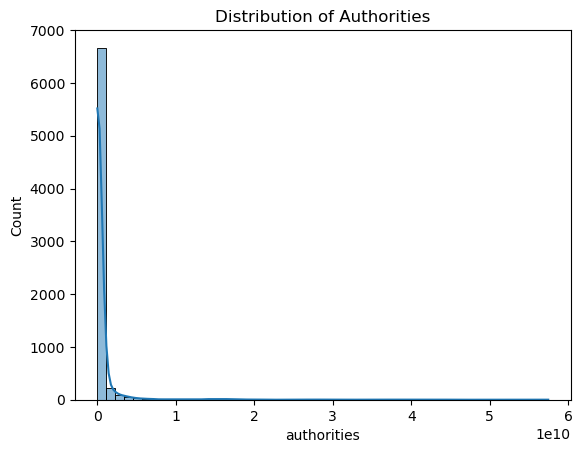

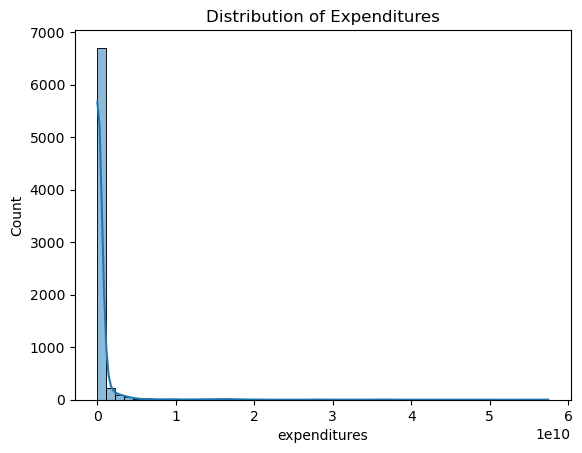

In [10]:
# Checking distributions
sns.histplot(df['authorities'], bins=50, kde=True)
plt.title("Distribution of Authorities")
plt.show()

sns.histplot(df['expenditures'], bins=50, kde=True)
plt.title("Distribution of Expenditures")
plt.show()

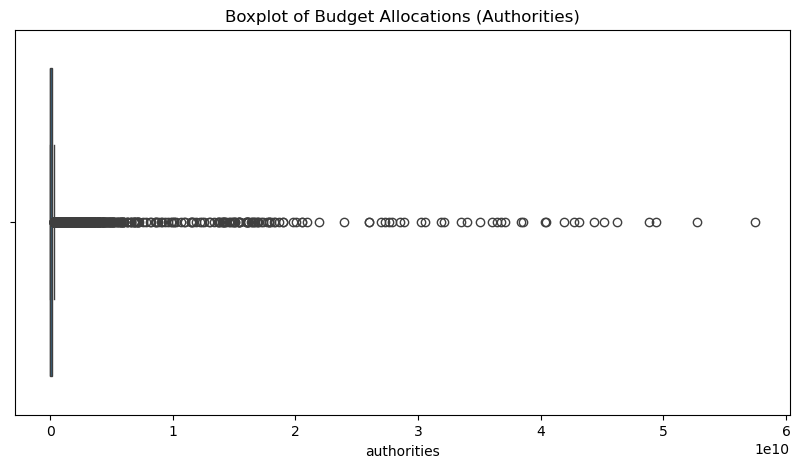

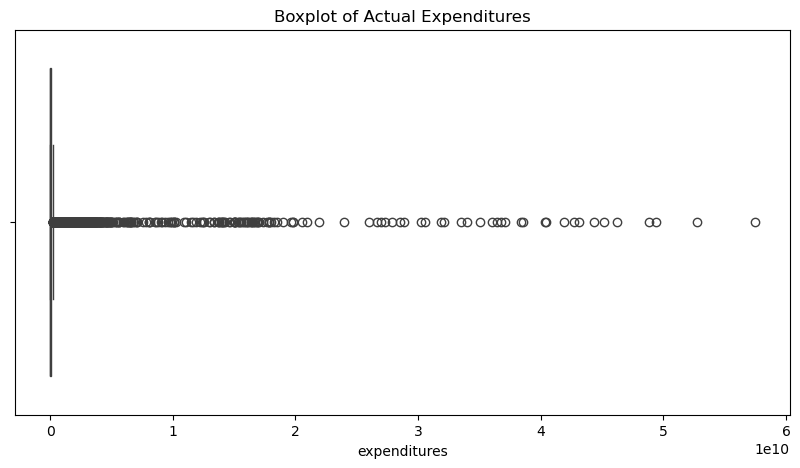

In [11]:

plt.figure(figsize=(10,5))
sns.boxplot(x=df['authorities'])
plt.title("Boxplot of Budget Allocations (Authorities)")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['expenditures'])
plt.title("Boxplot of Actual Expenditures")
plt.show()


Extreme Skewness & Outliers:

The data appears to be highly skewed, with a large number of outliers extending far to the right.
Most data points are concentrated near the lower end, but a few extremely high values (outliers) extend far beyond the main distribution.
Compressed Box (IQR is Small):

The main box (interquartile range, IQR) is extremely small, suggesting that the majority of the budget allocations are relatively low.
However, there are many high-value outliers.
Long Right Tail:

The presence of so many outliers and the long right tail indicates a few authorities receive significantly larger budgets compared to the rest.
Possible Interpretation:
A small number of authorities are allocated significantly higher budgets than the majority.
The budget data has a highly skewed distribution, where most values are clustered near the lower end.
If this is public budget allocation data, it suggests a large disparity in how funds are distributed.


In [13]:
#Check for Imbalanced Data
df.groupby('org_name')['authorities'].sum().sort_values(ascending=False)

org_name
Department of Finance                                            1343766587237.51001
Department of Employment and Social Development                   947848882375.95996
Department of National Defence                                    310359497811.37000
Department of Indigenous Services                                 162414742852.23001
Department of Crown-Indigenous Relations and Northern Affairs     128711322123.60001
                                                                         ...        
Registry of the Public Servants Disclosure Protection Tribunal         6677532.00000
Transportation Appeal Tribunal of Canada                               5919826.00000
Canadian Artists and Producers Professional Relations Tribunal         4412965.00000
Public Appointments Commission Secretariat                             2000107.00000
Freshwater Fish Marketing Corporation                                        1.00000
Name: authorities, Length: 152, dtype: float64

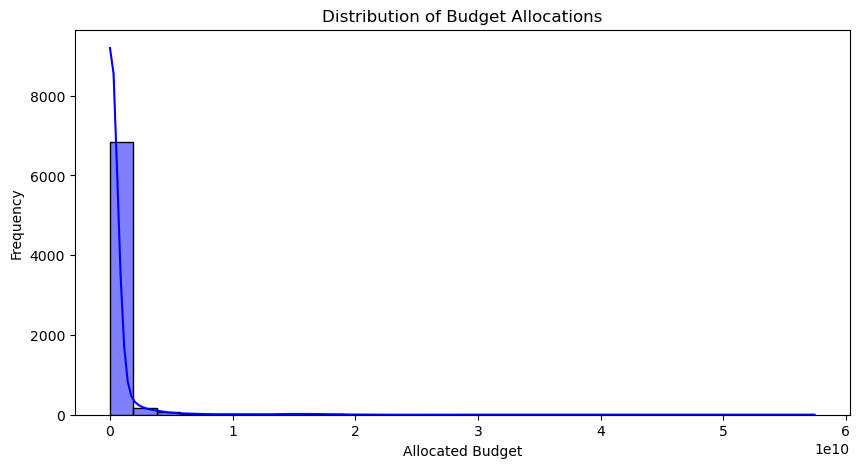

In [14]:
# Distribution of budget allocations
plt.figure(figsize=(10, 5))
sns.histplot(df["authorities"], bins=30, kde=True, color="blue")
plt.title("Distribution of Budget Allocations")
plt.xlabel("Allocated Budget")
plt.ylabel("Frequency")
plt.show()

In [15]:
# Skewness check
print("\n✅ Checking data skewness...")
print(df.skew(numeric_only=True))


✅ Checking data skewness...
org_id                0.98909
voted_or_statutory   -0.87830
authorities          10.09325
expenditures         10.46377
dtype: float64


## 8. Visualizations

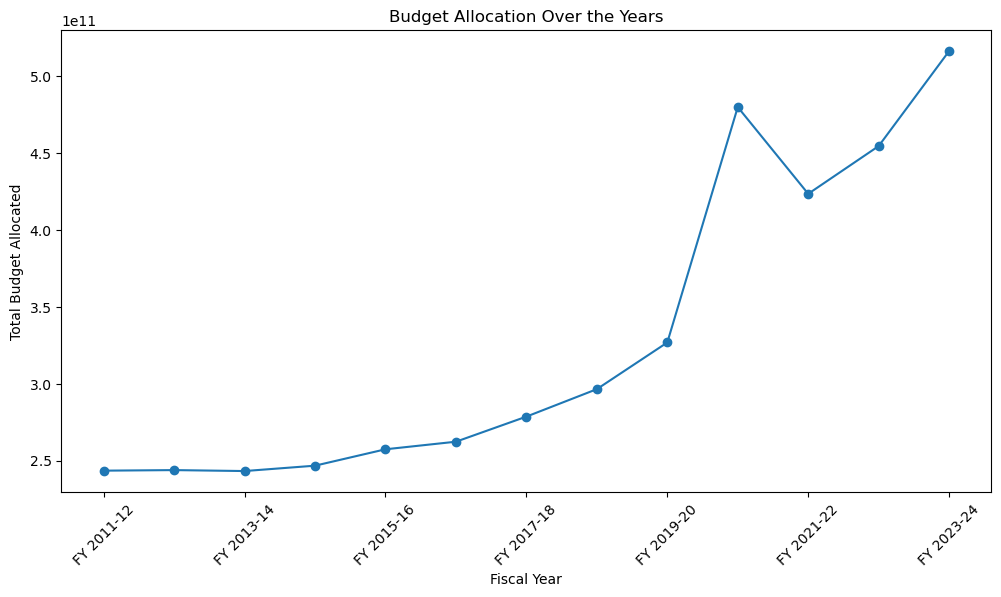

In [17]:
plt.figure(figsize=(12, 6))
df.groupby('fy_ef')['authorities'].sum().plot(marker='o')
plt.title("Budget Allocation Over the Years")
plt.xlabel("Fiscal Year")
plt.ylabel("Total Budget Allocated")
plt.xticks(rotation=45)
plt.show()


   fy_year        authorities       expenditures
0     2019 326833737082.00000 309627116287.00000
1     2020 479894268477.00000 445274700311.00000
2     2021 423493841554.64001 383048235022.94000
3     2022 454551616459.00000 398336343570.00000
4     2023 516326672941.12000 482410461001.12000


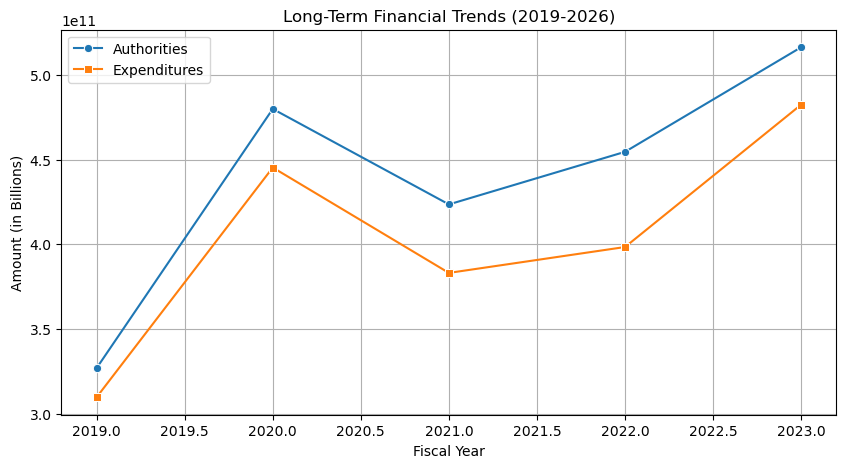

In [18]:
# Extracting the fiscal year from the 'fy_ef' column
df['fy_year'] = df['fy_ef'].apply(lambda x: int(x.split()[1].split('-')[0]))

# Filtering the dataset for the required years (2019-20 to 2026-27)
df_trend = df[(df['fy_year'] >= 2019) & (df['fy_year'] <= 2026)]

# Grouping by fiscal year to get the total authorities and expenditures
trend_data = df_trend.groupby('fy_year')[['authorities', 'expenditures']].sum().reset_index()

# Display the extracted trend data
print(trend_data)

# Plotting the trend of authorities and expenditures over the years
plt.figure(figsize=(10, 5))
sns.lineplot(x=trend_data['fy_year'], y=trend_data['authorities'], marker='o', label='Authorities')
sns.lineplot(x=trend_data['fy_year'], y=trend_data['expenditures'], marker='s', label='Expenditures')

plt.xlabel('Fiscal Year')
plt.ylabel('Amount (in Billions)')
plt.title('Long-Term Financial Trends (2019-2026)')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
df.head()

,fy_ef,org_id,org_name,voted_or_statutory,description,authorities,expenditures,fy_year
0,FY 2011-12,1.00000,Department of Agriculture and Agri-Food,0,Operating/Program,756690489.00000,704941276.00000,2011
1,FY 2011-12,1.00000,Department of Agriculture and Agri-Food,1,Grants & Contributions,459143202.00000,359941850.00000,2011
2,FY 2011-12,1.00000,Department of Agriculture and Agri-Food,29,Capital,34150756.00000,28848626.00000,2011
3,FY 2011-12,1.00000,Department of Agriculture and Agri-Food,46,Canadian Cattlemen's Association Legacy Fund,4893823.00000,4893823.00000,2011
8,FY 2011-12,1.00000,Department of Agriculture and Agri-Food,46,Contribution payments for the AgriInsurance pr...,571643883.00000,571643882.90000,2011


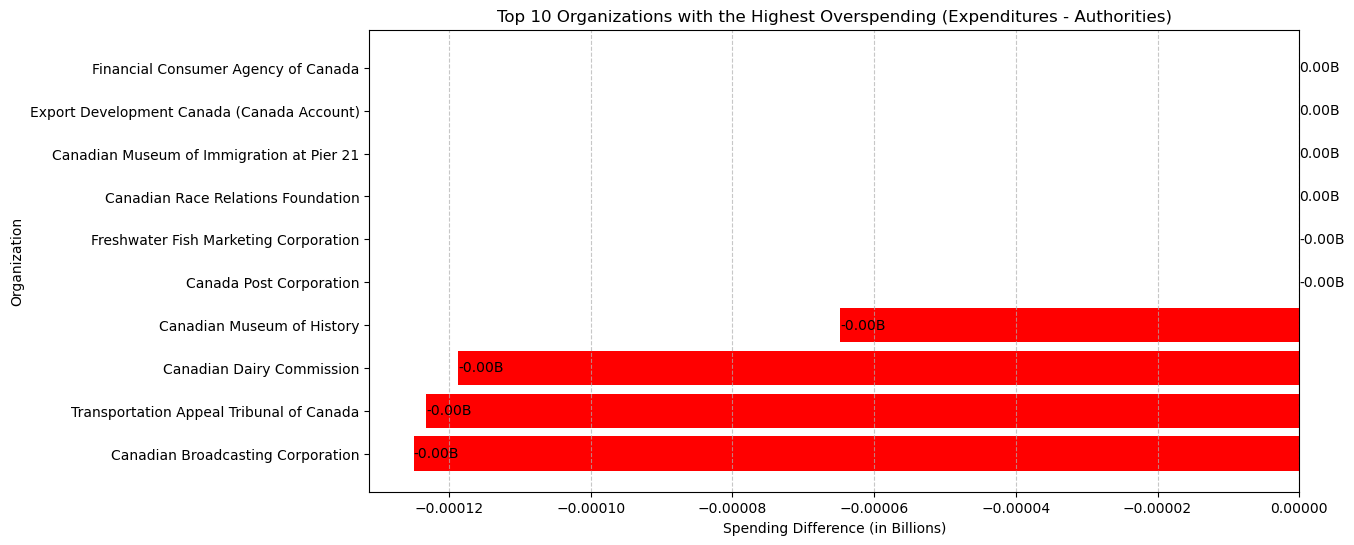

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the difference between actual spending and allocated budget expenditures
df['spending_difference'] = df['expenditures'] - df['authorities']

# Group by organization and sum up the spending difference
org_spending_diff = df.groupby('org_name')['spending_difference'].sum().reset_index()

# Sort by highest overspending organizations
top_overspending_orgs = org_spending_diff.sort_values(by='spending_difference', ascending=False).head(10)

# Convert to billions for better readability
top_overspending_orgs['spending_difference'] = top_overspending_orgs['spending_difference'] / 1e9  

# Plot the top organizations with highest overspending
plt.figure(figsize=(12, 6))
plt.barh(top_overspending_orgs['org_name'], top_overspending_orgs['spending_difference'], color='red')
plt.xlabel("Spending Difference (in Billions)")
plt.ylabel("Organization")
plt.title("Top 10 Organizations with the Highest Overspending (Expenditures - Authorities)")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Annotate the bars with exact values
for index, value in enumerate(top_overspending_orgs['spending_difference']):
    plt.text(value, index, f"{value:.2f}B", va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## Voted and Statutory Split (2024-25)

#### 1. **Authorities**
   - **Definition**: Authorities refer to the official permission granted by Parliament for government organizations to spend money within specified limits.
   - **Why Important**: It ensures that government spending is authorized and aligned with legal frameworks.
   - **Two Main Types**:
     - **Voted Authorities**: These are the amounts approved by **Parliament** through **Appropriation Acts**. The acts specify what the funds can be used for and provide an annual budget.
     - **Statutory Authorities**: These are approved by Parliament through specific laws (other than Appropriation Acts) that define the terms and purposes for spending.

#### 2. **Voted Amounts**
   - **Definition**: Voted amounts are the specific sums of money approved through **Appropriation Acts**, which Parliament passes each year to allow the government to spend money on public services, programs, and projects.
   - **Example**: If the government needs funds for a new initiative, Parliament passes an **Appropriation Act** to approve the spending. This spending is considered **voted authority**.

#### 3. **Statutory Authorities**
   - **Definition**: Statutory authorities refer to the funds that can be spent based on **laws** or **specific statutes** passed by Parliament. These do not require the approval of the annual **Appropriation Acts**.
   - **Why It Matters**: Some government expenses are authorized automatically through legislation, such as pension payments or interest on national debt. These amounts are automatically available due to existing laws.
   - **Example**: Payments for employee pensions or national debt interest payments are usually authorized through **statutory authorities**.

---

### **Graphs:**

#### 1. **Donut Chart (Voted vs Statutory Authorities)**
   - **Purpose**: This chart helps visualize the split between **Voted Authorities** and **Statutory Authorities** for a given fiscal year (e.g., FY 2024-25).
   - **How It Helps**: The donut chart visually displays the proportion of total government spending that is **voted on** (Parliamentary approval) vs. **statutorily authorized** (automatic authorization).
   - **Example**: A donut chart where **Voted Authorities** (blue) represent 60% and **Statutory Authorities** (green) represent 40% shows that 60% of the government's spending in the year was approved by Parliament through appropriation acts, while 40% was automatically authorized through statutes.

#### 2. **Bar Chart (Year-by-Year Comparison)**
   - **Purpose**: This chart compares **Voted Authorities** and **Statutory Authorities** over multiple fiscal years.
   - **How It Helps**: It shows changes in the government's reliance on **Voted Authorities** vs **Statutory Authorities** year by year, helping identify trends.
   - **Key Features**:
     - **Voted Authorities** are represented by one set of bars (e.g., blue bars), and **Statutory Authorities** by another (e.g., green bars).
     - The height of each bar represents the total amount of money in billions.
   - **Example**: If the **Voted Authorities** bar is taller than the **Statutory Authorities** bar for a given year, it means more of the government’s spending in that year was approved by Parliament through appropriation acts.

#### 3. **Line Graph (Trend Over Time)**
   - **Purpose**: This graph shows the trend of **Voted Authorities** and **Statutory Authorities** over multiple years.
   - **How It Helps**: It helps to visualize the trends and changes in government spending patterns, indicating shifts in reliance on **Voted Authorities** or **Statutory Authorities**.
   - **Example**: The line graph might show a steady increase in **Voted Authorities** over the years while **Statutory Authorities** remain constant, suggesting an increasing reliance on parliamentary approval rather than automatic authorization.

#### 4. **Stacked Area Chart (Authorities Over Time)**
   - **Purpose**: This chart shows how both **Voted** and **Statutory Authorities** have accumulated over time, visualizing their combined impact year by year.
   - **How It Helps**: It provides a cumulative view, allowing for a comparison of **Voted Authorities** and **Statutory Authorities** and their evolution over time.
   - **Example**: If the stacked area chart shows that **Voted Authorities** have consistently increased while **Statutory Authorities** remain steady, it reveals how the government is shifting toward more **Voted Authorities** as a method of funding.

#### 5. **Pie Chart (FY 2024-25 Split)**
   - **Purpose**: This chart shows the split between **Voted Authorities** and **Statutory Authorities** for the specific fiscal year, such as FY 2024-25.
   - **How It Helps**: A pie chart provides a simple, clear breakdown of the percentage share of each type of authority for a given year.
   - **Example**: A pie chart for FY 2024-25 could show that 65% of the budget is **Voted Authorities** and 35% is **Statutory Authorities**, allowing an easy comparison of the two types of funding for that year.

#### 6. **Heatmap (Authorities Comparison Over Time)**
   - **Purpose**: A heatmap visualizes the comparison of **Voted Authorities** and **Statutory Authorities** across multiple years, using color intensity to highlight areas of high or low spending.
   - **How It Helps**: The heatmap helps quickly identify years with higher or lower spending, showing which type of authority (Voted or Statutory) is dominant in specific periods.
   - **Example**: A heatmap might show that certain fiscal years (e.g., FY 2018-19) have significantly higher **Voted Authorities**, while others (e.g., FY 2020-21) rely more on **Statutory Authorities**.

---

### **Key Takeaways:**
- **Voted Authorities** refer to the funds approved annually by Parliament through **Appropriation Acts**.
- **Statutory Authorities** are funds authorized by specific laws passed by Parliament, which don’t require yearly approval.
- Various **charts** and **graphs** (e.g., **Donut Chart**, **Bar Chart**, **Line Chart**) help us understand and compare the trends, splits, and amounts of **Voted** and **Statutory Authorities** over time. These visualizations make it easier to analyze government spending patterns and changes.

# https://open.canada.ca/data/en/dataset/a35cf382-690c-4221-a971-cf0fd189a46f/resource/f87c5f47-dd85-4c6f-b85e-2c59ccf8d84c
# https://open.canada.ca/data/en/dataset/a35cf382-690c-4221-a971-cf0fd189a46f/resource/aefee504-b570-4deb-9b7e-da219fb94ef1

Total Authorities (Voted) for FY 2024-25: 224.39 Billion
Total Authorities (Statutory) for FY 2024-25: 262.28 Billion


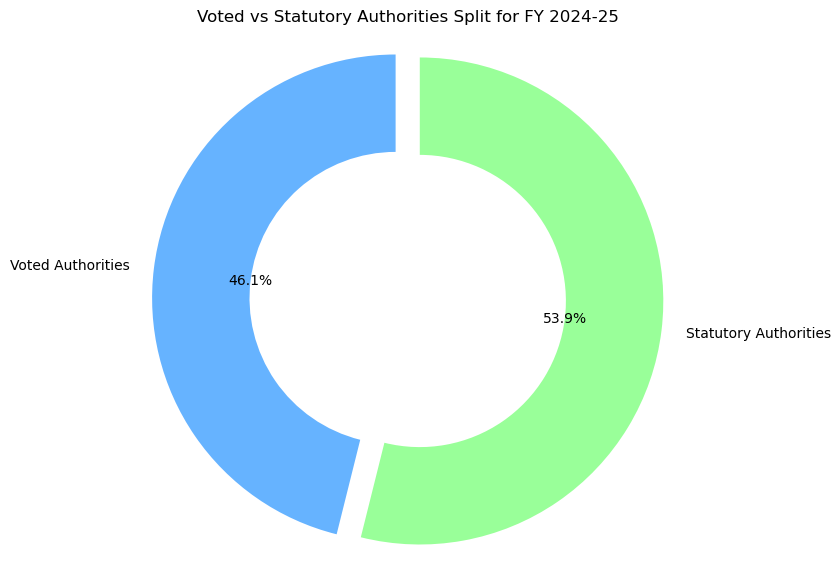

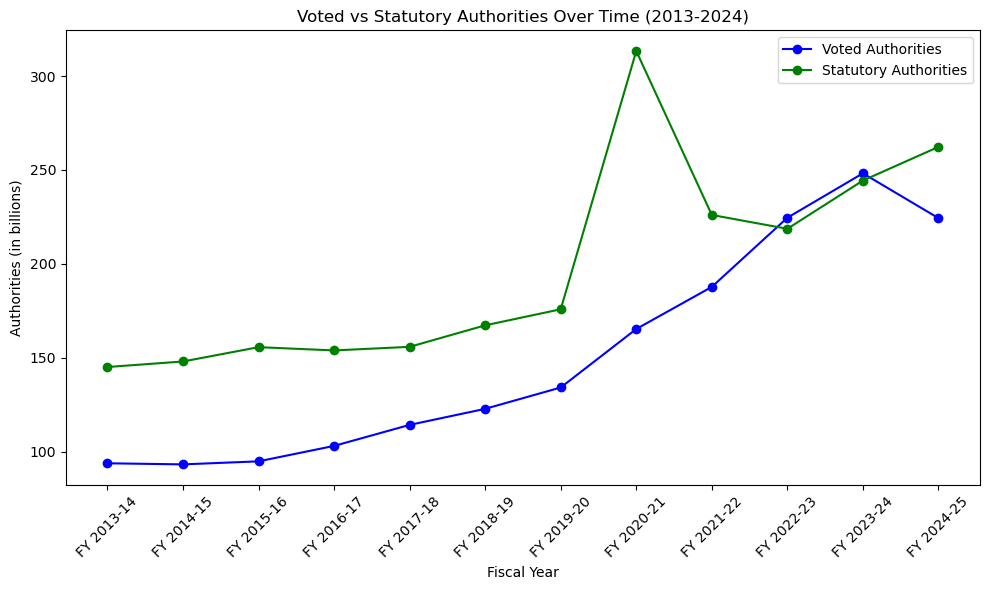

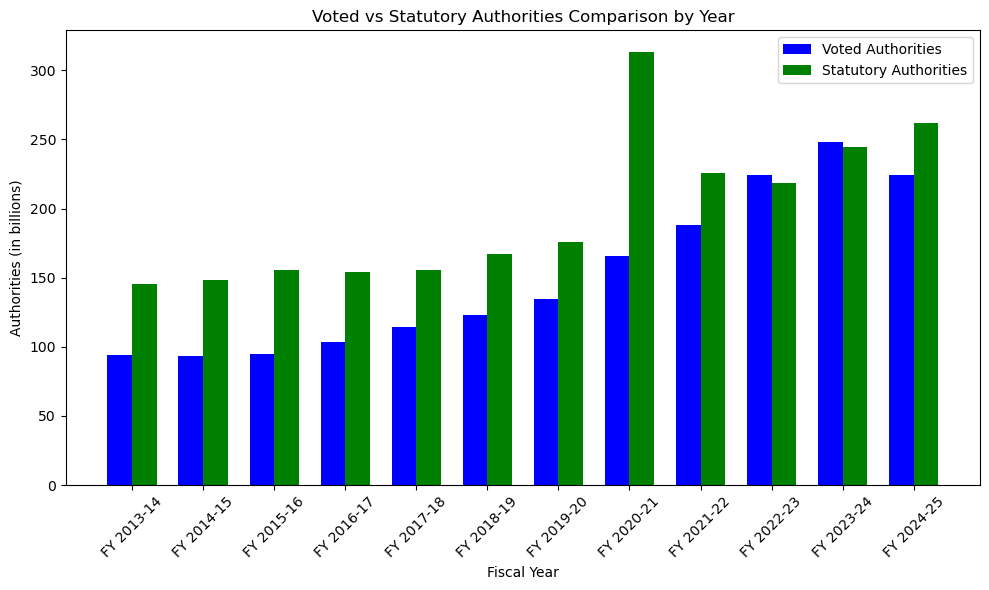

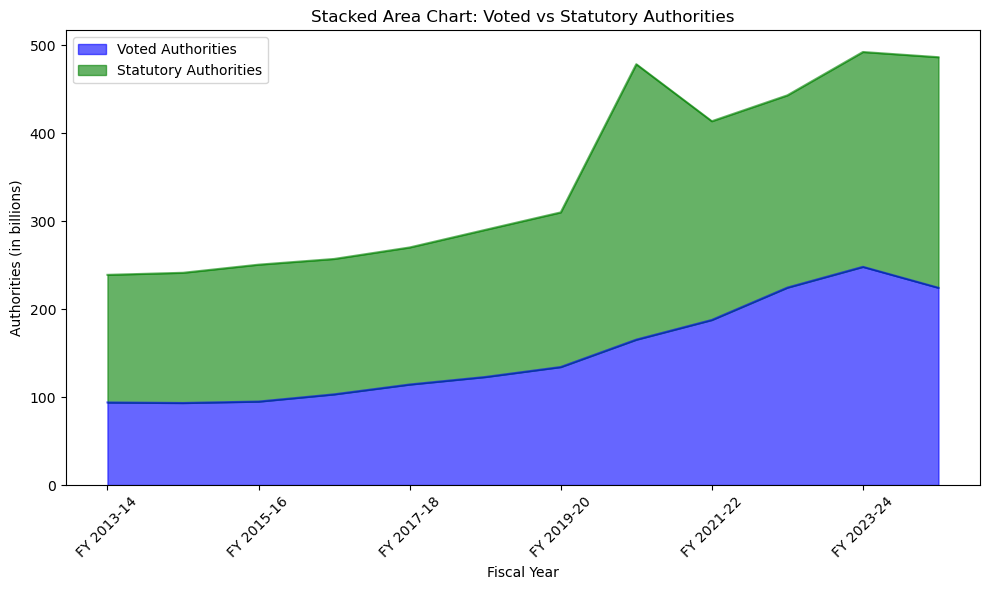

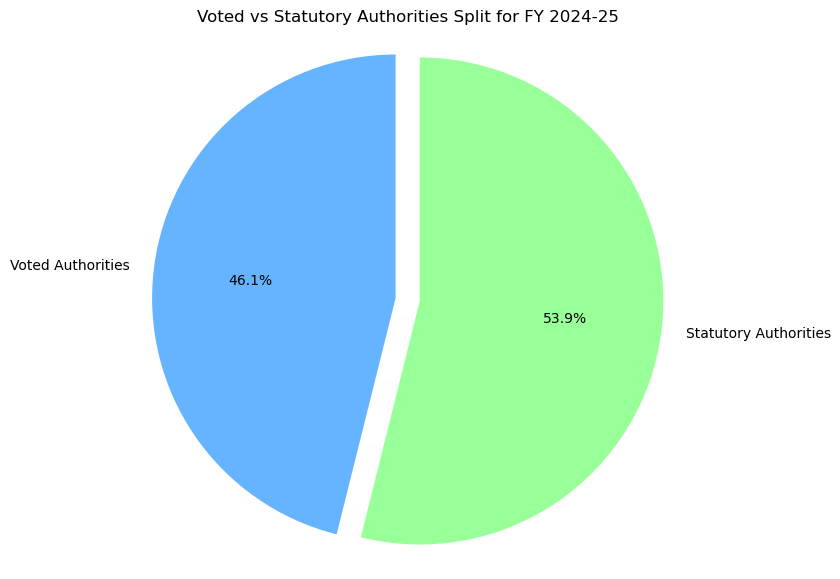

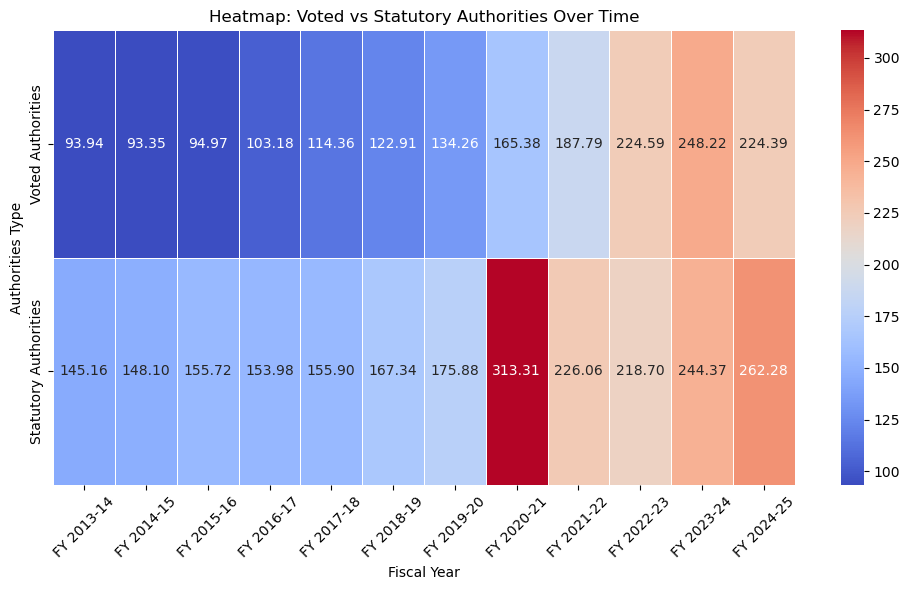

In [24]:
import urllib.request
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Base function to fetch data from the API
def fetch_records_from_api(url, batch_size=7000):
    records = []
    offset = 0  # Start from the first record

    while True:
        paginated_url = f"{url}&offset={offset}"

        try:
            response = urllib.request.urlopen(paginated_url)
            data = json.loads(response.read())

            if "result" in data and "records" in data["result"]:
                batch = data["result"]["records"]
                records.extend(batch)

                if len(batch) < batch_size:
                    break

                offset += batch_size
            else:
                print("Error: Unexpected API response format")
                break

        except Exception as e:
            print(f"Error occurred: {e}")
            break

    return records


# Function to process and sum authorities for a given fiscal year
def process_fiscal_data(url, fiscal_year='FY 2024-25'):
    all_records = fetch_records_from_api(url)
    df = pd.DataFrame(all_records)
    df['authorities'] = pd.to_numeric(df['authorities'], errors='coerce')
    df_fiscal_year = df[df['fy_ef'] == fiscal_year]
    total_authorities = df_fiscal_year['authorities'].sum()
    return total_authorities, df


# Define API URLs for each dataset
url_voted_authorities = 'https://open.canada.ca/data/en/api/3/action/datastore_search?resource_id=f87c5f47-dd85-4c6f-b85e-2c59ccf8d84c&limit=10000'
url_statutory_forecasts = 'https://open.canada.ca/data/en/api/3/action/datastore_search?resource_id=aefee504-b570-4deb-9b7e-da219fb94ef1&limit=10000'

# Process data for Voted Authorities and Statutory Forecasts
total_authorities_voted, df_voted = process_fiscal_data(url_voted_authorities)
total_authorities_statutory, df_statutory = process_fiscal_data(url_statutory_forecasts)

# Convert totals to billions for easier readability
total_authorities_voted_billion = total_authorities_voted / 1e9
total_authorities_statutory_billion = total_authorities_statutory / 1e9

print(f"Total Authorities (Voted) for FY 2024-25: {total_authorities_voted_billion:.2f} Billion")
print(f"Total Authorities (Statutory) for FY 2024-25: {total_authorities_statutory_billion:.2f} Billion")

# Create a donut chart showing the split
def create_donut_chart():
    labels = ['Voted Authorities', 'Statutory Authorities']
    sizes = [total_authorities_voted, total_authorities_statutory]
    colors = ['#66b3ff', '#99ff99']
    explode = (0.1, 0)  # explode the first slice (Voted)

    fig, ax = plt.subplots(figsize=(7, 7))
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), explode=explode)
    ax.axis('equal')
    plt.title('Voted vs Statutory Authorities Split for FY 2024-25')
    plt.show()


# Line Chart for Authorities Over Time (Voted vs Statutory)
def plot_line_chart():
    df_voted['authorities'] = pd.to_numeric(df_voted['authorities'], errors='coerce')
    df_statutory['authorities'] = pd.to_numeric(df_statutory['authorities'], errors='coerce')

    voted_by_year = df_voted.groupby('fy_ef')['authorities'].sum() / 1e9
    statutory_by_year = df_statutory.groupby('fy_ef')['authorities'].sum() / 1e9

    plt.figure(figsize=(10, 6))
    plt.plot(voted_by_year.index, voted_by_year.values, label='Voted Authorities', marker='o', color='blue')
    plt.plot(statutory_by_year.index, statutory_by_year.values, label='Statutory Authorities', marker='o', color='green')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Authorities (in billions)')
    plt.title('Voted vs Statutory Authorities Over Time (2013-2024)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Bar Chart for Authorities Comparison by Fiscal Year

def plot_bar_chart():
    voted_by_year = df_voted.groupby('fy_ef')['authorities'].sum() / 1e9
    statutory_by_year = df_statutory.groupby('fy_ef')['authorities'].sum() / 1e9

    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.35
    
    # Ensure 'x' is numerical using np.arange()
    x = np.arange(len(voted_by_year))

    # Plotting the bars
    ax.bar(x - bar_width / 2, voted_by_year.values, bar_width, label='Voted Authorities', color='blue')
    ax.bar(x + bar_width / 2, statutory_by_year.values, bar_width, label='Statutory Authorities', color='green')

    ax.set_xlabel('Fiscal Year')
    ax.set_ylabel('Authorities (in billions)')
    ax.set_title('Voted vs Statutory Authorities Comparison by Year')
    ax.set_xticks(x)
    ax.set_xticklabels(voted_by_year.index, rotation=45)
    ax.legend()
    plt.tight_layout()
    plt.show()

# Stacked Area Chart for Authorities Over Time
def plot_stacked_area_chart():
    voted_by_year = df_voted.groupby('fy_ef')['authorities'].sum() / 1e9
    statutory_by_year = df_statutory.groupby('fy_ef')['authorities'].sum() / 1e9

    total_by_year = pd.DataFrame({
        'Voted Authorities': voted_by_year,
        'Statutory Authorities': statutory_by_year
    })

    total_by_year.plot(kind='area', stacked=True, figsize=(10, 6), alpha=0.6, color=['blue', 'green'])
    plt.xlabel('Fiscal Year')
    plt.ylabel('Authorities (in billions)')
    plt.title('Stacked Area Chart: Voted vs Statutory Authorities')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Pie Chart for Specific Fiscal Year (FY 2024-25) Comparison
def plot_pie_chart():
    df_voted_2024 = df_voted[df_voted['fy_ef'] == 'FY 2024-25']
    df_statutory_2024 = df_statutory[df_statutory['fy_ef'] == 'FY 2024-25']

    total_voted_2024 = df_voted_2024['authorities'].sum() / 1e9  # in billions
    total_statutory_2024 = df_statutory_2024['authorities'].sum() / 1e9  # in billions

    labels = ['Voted Authorities', 'Statutory Authorities']
    sizes = [total_voted_2024, total_statutory_2024]
    colors = ['#66b3ff', '#99ff99']
    explode = (0.1, 0)  # explode the first slice (Voted)

    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
    plt.title('Voted vs Statutory Authorities Split for FY 2024-25')
    plt.axis('equal')
    plt.show()


# Heatmap for Authorities by Fiscal Year
def plot_heatmap():
    voted_by_year = df_voted.groupby('fy_ef')['authorities'].sum() / 1e9
    statutory_by_year = df_statutory.groupby('fy_ef')['authorities'].sum() / 1e9

    heatmap_data = pd.DataFrame({
        'Voted Authorities': voted_by_year,
        'Statutory Authorities': statutory_by_year
    }).transpose()

    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Heatmap: Voted vs Statutory Authorities Over Time')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Authorities Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Call visualization functions
create_donut_chart()        # Donut chart for Voted vs Statutory
plot_line_chart()           # Line chart for authorities over time
plot_bar_chart()            # Bar chart for comparison per fiscal year
plot_stacked_area_chart()   # Stacked area chart for authorities over time
plot_pie_chart()            # Pie chart for FY 2024-25 split
plot_heatmap()              # Heatmap for authorities comparison over time


## 9. Building Models - need review

 Linear Regression model to predict expenditures (the target variable) based on a set of features (such as org_id, org_name, voted_or_statutory, description, and authorities).


Observations from the Scatter Plot:

Lower expenditure values seem to have better prediction accuracy, as points are closer to the ideal diagonal trend.

Higher expenditures show more variance, indicating that the model struggles slightly with larger budget allocations. This could be due to the presence of outliers or non-linear relationships that the model may not fully capture.

There are a few points farther from the main trend, suggesting some cases where the model either underestimates or overestimates expenditures significantly.



Linear Regression - Mean Absolute Error: 54327435.31, R² Score: 0.9976
Random Forest - Mean Absolute Error: 31796229.53, R² Score: 0.9981


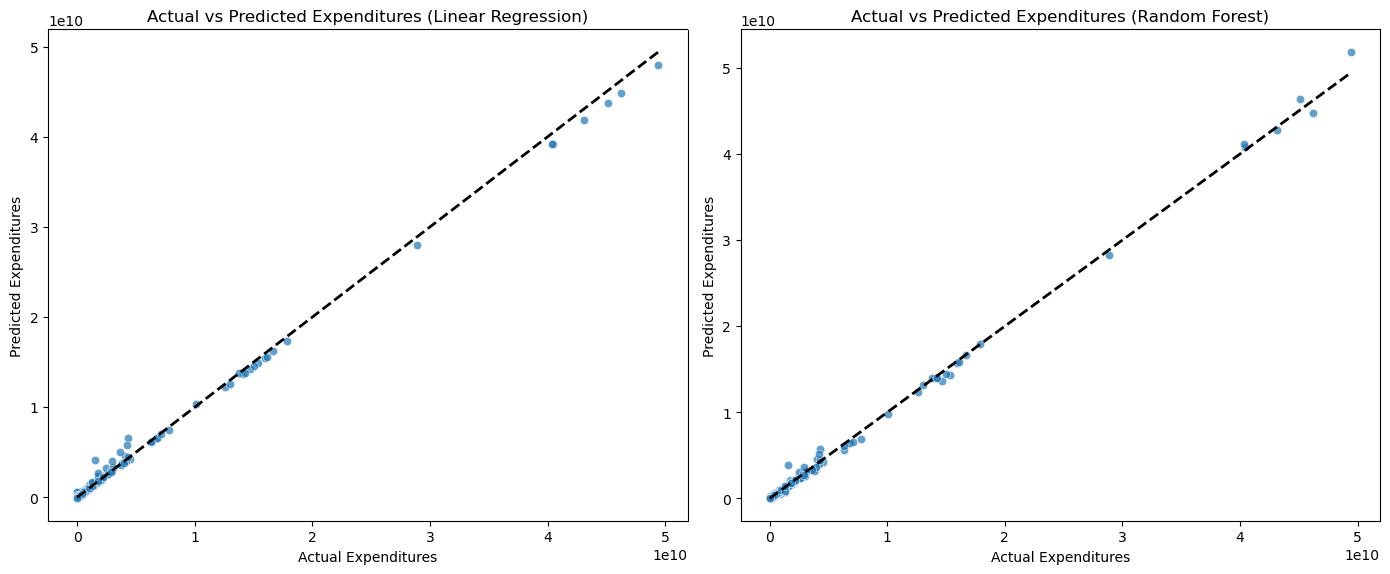

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the numeric year from the fiscal year column
df['fy_numeric'] = df['fy_ef'].str.extract(r'(\d{4})').astype(int)

# Define features and target variable
X = df[['fy_numeric', 'authorities', 'org_id']]
y = df['expenditures']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train models and store predictions
predictions = {}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    predictions[name] = y_pred
    results[name] = {"MAE": mae, "R² Score": r2}

    print(f"{name} - Mean Absolute Error: {mae:.2f}, R² Score: {r2:.4f}")

# Create side-by-side scatter plots for both models
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, (name, y_pred) in zip(axes, predictions.items()):
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, ax=ax)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Ideal prediction line
    ax.set_xlabel("Actual Expenditures")
    ax.set_ylabel("Predicted Expenditures")
    ax.set_title(f"Actual vs Predicted Expenditures ({name})")

plt.tight_layout()
plt.show()


In [29]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for RandomForestRegressor
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform GridSearchCV on the training data
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best model
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Random Forest - Mean Absolute Error: {mae_best_rf:.2f}, R² Score: {r2_best_rf:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest - Mean Absolute Error: 32519762.28, R² Score: 0.9982


Classification Accuracy: 96.40%
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1405
           1       0.21      0.13      0.16        38

    accuracy                           0.96      1443
   macro avg       0.59      0.56      0.57      1443
weighted avg       0.96      0.96      0.96      1443



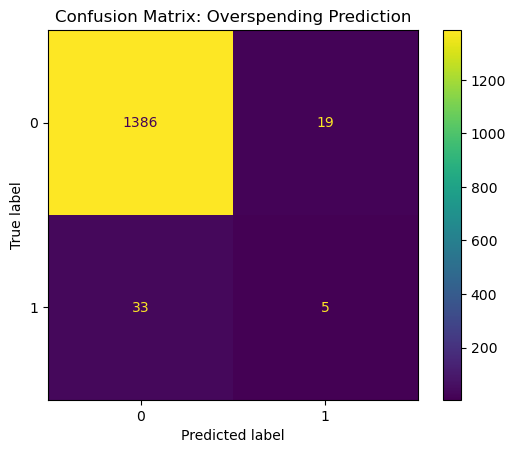

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Define overspending: 1 if expenditures > authorities, else 0
df['overspent'] = (df['expenditures'] > df['authorities']).astype(int)

# Select features
X = df[['fy_numeric', 'authorities', 'org_id']]
y = df['overspent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
plt.title("Confusion Matrix: Overspending Prediction")
plt.show()


This confusion matrix evaluates the overspending prediction model (Random Forest Classifier). Here’s what it tells us:

True Negatives (TN) = 1386 → The model correctly predicted "Not Overspent" (0) when it was actually Not Overspent.

False Positives (FP) = 19 → The model incorrectly predicted "Overspent" (1) when it was actually Not Overspent.

False Negatives (FN) = 33 → The model incorrectly predicted "Not Overspent" (0) when it was actually Overspent.

True Positives (TP) = 5 → The model correctly predicted "Overspent" (1) when it was actually Overspent.

Performance Insights:
The model is highly biased towards "Not Overspent" (0).

Only 5 true positives → This suggests the model struggles to identify overspending.

More false negatives (33) than true positives → It fails to detect many overspending cases.

Random Forest - Cross-Validation Accuracy: 96.50%
Decision Tree - Cross-Validation Accuracy: 95.32%
Logistic Regression - Cross-Validation Accuracy: 96.78%
Gradient Boosting - Cross-Validation Accuracy: 96.74%

Best Model: Logistic Regression
Test Accuracy: 97.37%
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1405
           1       0.00      0.00      0.00        38

    accuracy                           0.97      1443
   macro avg       0.49      0.50      0.49      1443
weighted avg       0.95      0.97      0.96      1443



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


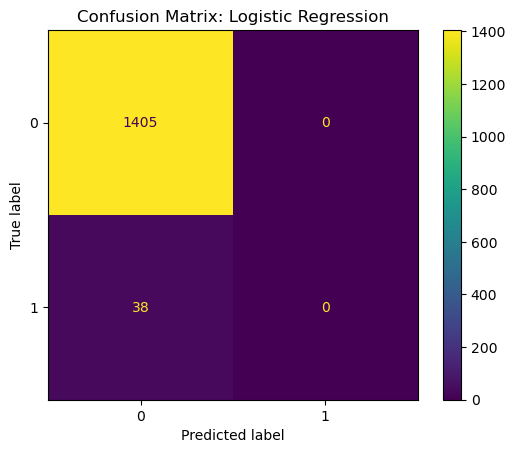

In [32]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define overspending: 1 if expenditures > authorities, else 0
df['overspent'] = (df['expenditures'] > df['authorities']).astype(int)

# Select features
X = df[['fy_numeric', 'authorities', 'org_id']]
y = df['overspent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate models using cross-validation
cv_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores[name] = scores.mean()
    print(f"{name} - Cross-Validation Accuracy: {scores.mean() * 100:.2f}%")

# Train the best model on full training data and evaluate
best_model_name = max(cv_scores, key=cv_scores.get)
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

# Final Evaluation
final_accuracy = accuracy_score(y_test, y_pred)
print(f"\nBest Model: {best_model_name}")
print(f"Test Accuracy: {final_accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

# Confusion matrix for the best model
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title(f"Confusion Matrix: {best_model_name}")
plt.show()


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/var/folders/qd/mt8874rj291flhmx605n27n40000gn/T/ipykernel_63622/275697983.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['fy_ef'] = df['fy_ef'].str.extract('(\d{4})').astype(int)


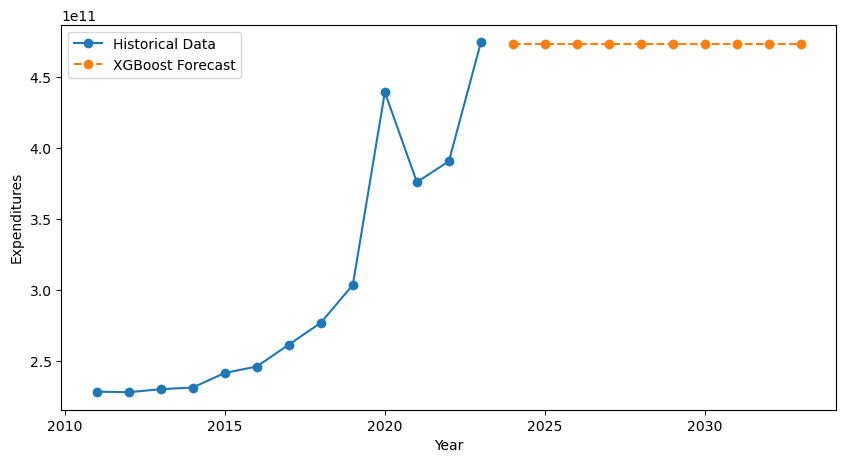

In [33]:
# Preprocess
df=raw_df.copy()
df['fy_ef'] = df['fy_ef'].str.extract('(\d{4})').astype(int)
df = df.groupby('fy_ef')['expenditures'].sum().reset_index()

# Train-test split
X = df[['fy_ef']]
y = df['expenditures']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Predict future 10 years
future_years = np.arange(df['fy_ef'].max() + 1, df['fy_ef'].max() + 11).reshape(-1, 1)
future_pred = model.predict(future_years)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['fy_ef'], df['expenditures'], label="Historical Data", marker='o')
plt.plot(future_years, future_pred, label="XGBoost Forecast", marker='o', linestyle='dashed')
plt.xlabel("Year")
plt.ylabel("Expenditures")
plt.legend()
plt.show()


Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2862  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2369
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1570
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0475
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0477
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0404
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0525
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0331
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0241
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0402
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0492
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0305
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0752
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158    
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

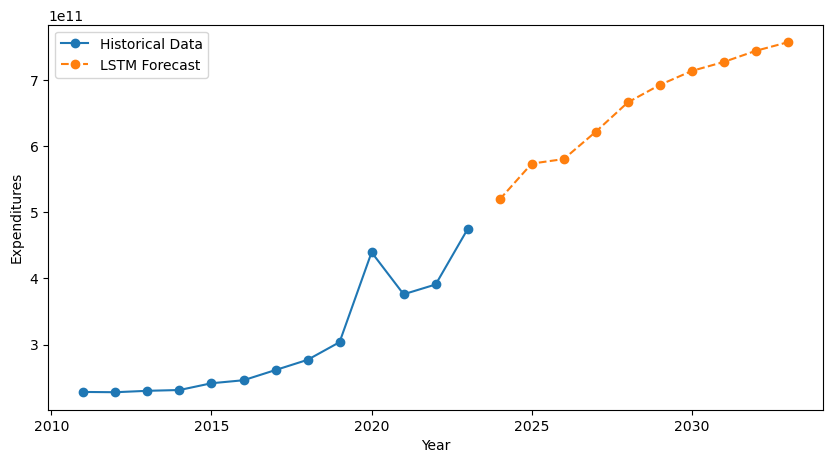

In [34]:
df=raw_df.copy()
# Extract and process fiscal year
df['fy_ef'] = df['fy_ef'].str.extract(r'(\d{4})').astype(int)  # Fix invalid escape sequence
df = df.groupby('fy_ef')['expenditures'].sum().reset_index()  # Aggregate by year

# Normalize data
scaler = MinMaxScaler()
df['expenditures'] = scaler.fit_transform(df[['expenditures']])

# Create sequences for LSTM
def create_sequences(data, seq_length=5):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 5
X, y = create_sequences(df['expenditures'].values, seq_length)

# Reshape for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, batch_size=1, verbose=1)

# Generate predictions for the next 10 years
future_exp = []
future_input = df['expenditures'].values[-seq_length:].tolist()

for _ in range(10):
    future_pred = model.predict(np.array(future_input).reshape(1, seq_length, 1))
    future_exp.append(future_pred.flatten()[0])  # Store as a scalar value
    future_input.append(future_pred.flatten()[0])
    future_input.pop(0)  # Maintain sequence length

# Convert back to original scale
future_years = np.arange(df['fy_ef'].values[-1] + 1, df['fy_ef'].values[-1] + 11)
future_exp = scaler.inverse_transform(np.array(future_exp).reshape(-1, 1)).flatten()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['fy_ef'], scaler.inverse_transform(df[['expenditures']]), label="Historical Data", marker='o')
plt.plot(future_years, future_exp, label="LSTM Forecast", marker='o', linestyle='dashed')
plt.xlabel("Year")
plt.ylabel("Expenditures")
plt.legend()
plt.show()

In [35]:
# Print the forecasted values
print("Year | Forecasted Expenditures")
print("-" * 30)
for year, exp in zip(future_years, future_exp):
    print(f"{year} | {exp:,.2f}")  # Format with commas and 2 decimal places


Year | Forecasted Expenditures
------------------------------
2024 | 519,681,933,312.00
2025 | 573,872,930,816.00
2026 | 580,739,530,752.00
2027 | 622,090,190,848.00
2028 | 666,519,666,688.00
2029 | 693,005,647,872.00
2030 | 714,175,938,560.00
2031 | 727,774,920,704.00
2032 | 744,643,362,816.00
2033 | 757,610,577,920.00


In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load dataset
df = raw_df1.copy()

# Extract fiscal year
df['fy'] = df['fy_ef'].str.extract(r'(\d{4})').astype(int)

# Group by department
grouped = df.groupby('org_name').agg({
    'authorities': 'mean',
    'expenditures': 'mean'
}).reset_index()

# Normalize
scaler = StandardScaler()
features = scaler.fit_transform(grouped[['authorities', 'expenditures']])


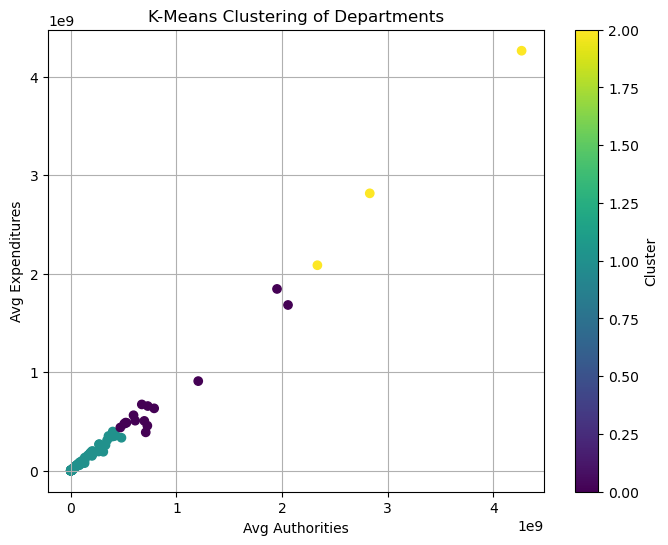

In [37]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
grouped['cluster'] = kmeans.fit_predict(features)

# Plot Clusters
plt.figure(figsize=(8, 6))
plt.scatter(grouped['authorities'], grouped['expenditures'], c=grouped['cluster'], cmap='viridis')
plt.xlabel('Avg Authorities')
plt.ylabel('Avg Expenditures')
plt.title('K-Means Clustering of Departments')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [38]:
# Show 5 sample departments from each cluster
#Display 5 sample departments from each K-Means cluster based on a chosen metric (e.g., expenditures).
for cluster_id in sorted(grouped['cluster'].unique()):
    print(f"\n🔸 Cluster {cluster_id} Departments:")
    sample = grouped[grouped['cluster'] == cluster_id].sort_values(by='expenditures', ascending=False).head(5)
    print(sample[['org_name', 'authorities', 'expenditures']])



🔸 Cluster 0 Departments:
                                             org_name      authorities  \
60                     Department of National Defence 1951946527.11553   
57                  Department of Indigenous Services 2055882820.91430   
56  Department of Housing, Infrastructure and Comm... 1206566337.71500   
70         Export Development Canada (Canada Account)  672814209.19476   
12          Canadian Air Transport Security Authority  729131839.50000   

       expenditures  
60 1845111786.66686  
57 1682126886.02557  
56  909648047.76461  
70  672814209.20905  
12  656572756.28571  

🔸 Cluster 1 Departments:
                                             org_name     authorities  \
14                  Canadian Broadcasting Corporation 397846570.48718   
4                       Canada Border Services Agency 418389502.08554   
53                 Department of Fisheries and Oceans 425291501.39673   
24             Canadian Institutes of Health Research 357419646.50860   
63  De

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = raw_df1.copy()

# Extract fiscal year
df['fy'] = df['fy_ef'].str.extract(r'(\d{4})').astype(int)

# Calculate efficiency
df['efficiency'] = (df['expenditures'] / df['authorities']) * 100

# Group by department and year
eff_df = df.groupby(['org_name', 'fy'])[['authorities', 'expenditures', 'efficiency']].mean().reset_index()

# Display top inefficient or highly efficient entries
print(eff_df.sort_values('efficiency', ascending=True).head(10))  # least efficient
print(eff_df.sort_values('efficiency', ascending=False).head(10))  # most efficient

# Plot for one department
'''
dept = 'Department of Agriculture and Agri-Food'
dept_df = eff_df[eff_df['org_name'] == dept]

plt.figure(figsize=(10, 6))
plt.plot(dept_df['fy'], dept_df['efficiency'], marker='o', label='Efficiency %')
plt.axhline(100, color='gray', linestyle='--', label='100% Utilization')
plt.title(f'Budget Utilization Efficiency: {dept}')
plt.xlabel('Fiscal Year')
plt.ylabel('Efficiency (%)')
plt.legend()
plt.grid(True)
plt.show()
'''

                                               org_name    fy     authorities  \
867               Freshwater Fish Marketing Corporation  2022         1.00000   
1404         Public Appointments Commission Secretariat  2012    992250.00000   
948                            Law Commission of Canada  2022   4370781.00000   
1490  Secretariat of the National Security and Intel...  2017   4261607.00000   
941                                Invest in Canada Hub  2017  11103293.00000   
1575             The Federal Bridge Corporation Limited  2011  64699000.00000   
1338                                    PPP Canada Inc.  2017 139750000.00000   
391              Canadian Security Intelligence Service  2019  78747390.62500   
1658                   Windsor-Detroit Bridge Authority  2015 461094912.00000   
1578             The Federal Bridge Corporation Limited  2014  21040000.00000   

        expenditures  efficiency  
867          0.00000     0.00000  
1404         0.00000     0.00000  
948

"\ndept = 'Department of Agriculture and Agri-Food'\ndept_df = eff_df[eff_df['org_name'] == dept]\n\nplt.figure(figsize=(10, 6))\nplt.plot(dept_df['fy'], dept_df['efficiency'], marker='o', label='Efficiency %')\nplt.axhline(100, color='gray', linestyle='--', label='100% Utilization')\nplt.title(f'Budget Utilization Efficiency: {dept}')\nplt.xlabel('Fiscal Year')\nplt.ylabel('Efficiency (%)')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

## Optional

https://open.canada.ca/data/en/dataset/a35cf382-690c-4221-a971-cf0fd189a46f/resource/64774bc1-c90a-4ae2-a3ac-d9b50673a895

Columns in API response: Index(['_id', 'fy_ef', 'organization_id', 'organization',
       'core_responsibility', 'program_id', 'program_name',
       'planned_spending_1', 'actual_spending', 'planned_spending_2',
       'planned_spending_3', 'planned_ftes_1', 'actual_ftes', 'planned_ftes_2',
       'planned_ftes_3', 'planning_explanation', 'variance_explanation'],
      dtype='object')
KNN Model - Mean Squared Error: 3344069109625600.5, R²: 0.795990671015441
Decision Tree Model - Mean Squared Error: 1294372058803475.2, R²: 0.9210351321948536
Linear Regression Model - Mean Squared Error: 292574237825598.2, R²: 0.982151124279949
Ridge Regression Model - Mean Squared Error: 292574237594410.3, R²: 0.9821511242940529


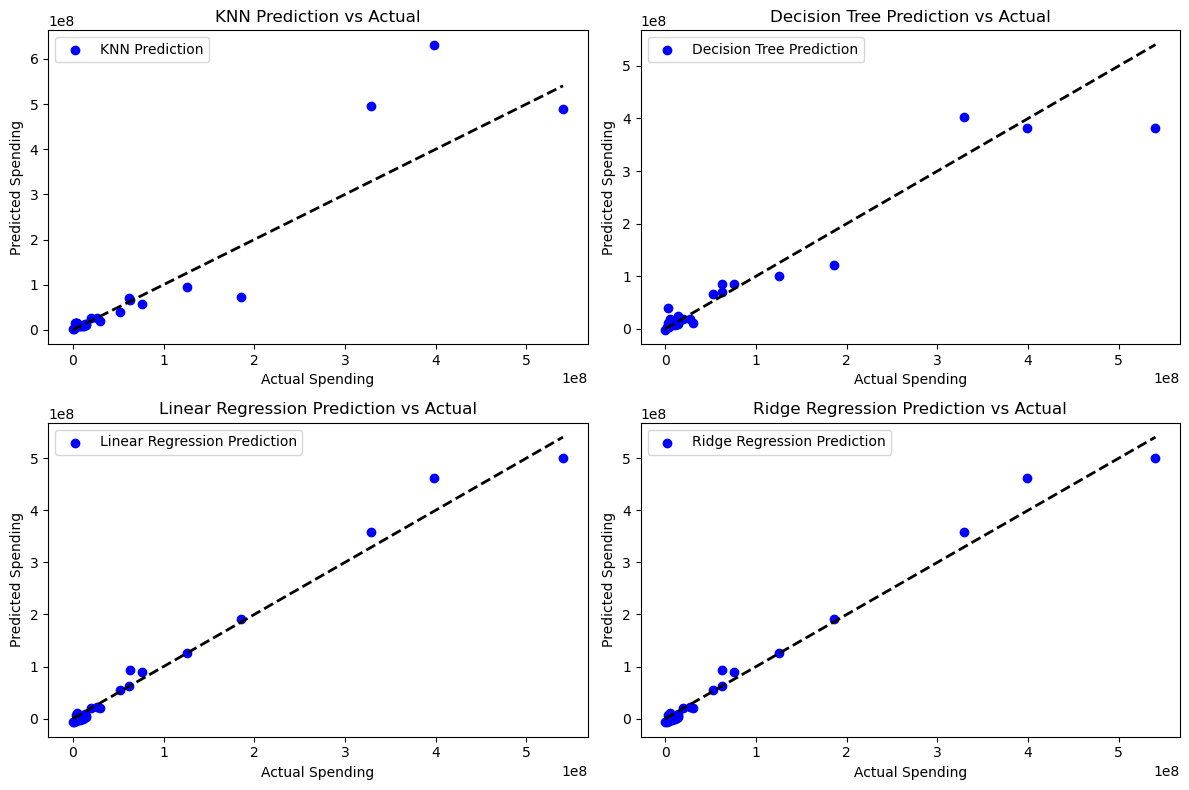

In [43]:
import urllib.request
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# API URL for fetching real data
api_url = "https://open.canada.ca/data/en/api/3/action/datastore_search?resource_id=64774bc1-c90a-4ae2-a3ac-d9b50673a895"

# Function to fetch data from API
def fetch_records_from_api(url, batch_size=7000):
    records = []
    offset = 0  

    while True:
        paginated_url = f"{url}&offset={offset}"
        try:
            response = urllib.request.urlopen(paginated_url)
            data = json.loads(response.read())

            if "result" in data and "records" in data["result"]:
                batch = data["result"]["records"]
                records.extend(batch)

                if len(batch) < batch_size:
                    break

                offset += batch_size
            else:
                print("Error: Unexpected API response format")
                break
        except Exception as e:
            print(f"Error occurred: {e}")
            break

    return records

# Fetch data from API
raw_data = fetch_records_from_api(api_url)

# Convert to DataFrame
df_spending = pd.DataFrame(raw_data)

# Check available columns
print("Columns in API response:", df_spending.columns)

# Select relevant columns and ensure numeric values
selected_columns = ['planned_spending_1', 'actual_spending', 'planned_ftes_1', 'actual_ftes']

# Ensure selected columns exist in the dataset
df_spending = df_spending[selected_columns].dropna()

# Convert to numeric type
df_spending = df_spending.astype(float)

# Features (X) and Target (y)
X = df_spending[['planned_spending_1', 'planned_ftes_1']]
y = df_spending['actual_spending']  

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and Train Models
models = {
    "KNN": KNeighborsRegressor(n_neighbors=3),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0)
}

predictions = {}
errors = []

for name, model in models.items():
    if name == "KNN":
        model.fit(X_train_scaled, y_train)
        pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)

    predictions[name] = pred
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    errors.append((name, mse, r2))
    print(f"{name} Model - Mean Squared Error: {mse}, R²: {r2}")

# Visualize Predictions vs Actual
plt.figure(figsize=(12, 8))
for i, (name, pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(y_test, pred, label=f"{name} Prediction", color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel("Actual Spending")
    plt.ylabel("Predicted Spending")
    plt.title(f"{name} Prediction vs Actual")
    plt.legend()

plt.tight_layout()
plt.show()


### Notes on the Models You Are Building:

In the code you've provided, you are building **4 machine learning models** using data fetched from an API regarding **planned spending** and **planned FTEs** (Full-Time Equivalents), with the aim of predicting **actual spending**. Below are the detailed notes specific to what you are building:

---

### **1. K-Nearest Neighbors (KNN) Regression:**
- **Purpose**: This model predicts `actual_spending` based on the nearest neighbors in the feature space. The closest data points (programs with similar `planned_spending_1` and `planned_ftes_1`) are used to determine the prediction.
- **How it's Built**:
  - You use the KNN algorithm to predict spending using `planned_spending_1` and `planned_ftes_1` as features.
  - `n_neighbors=3`: The algorithm looks at the 3 closest data points to make the prediction.
- **Prediction Goal**: For each program, it predicts how close the `actual_spending` is to that of similar programs based on the planned values.

---

### **2. Decision Tree Regression:**
- **Purpose**: This model builds a decision tree to partition the data into smaller segments based on the values of `planned_spending_1` and `planned_ftes_1`. Each segment then makes predictions for `actual_spending`.
- **How it's Built**:
  - The algorithm splits the dataset recursively based on feature thresholds, creating branches and leaves that predict `actual_spending`.
  - It's a **non-linear** model, capable of capturing more complex relationships between the features and the target variable.
- **Prediction Goal**: The decision tree will identify which combinations of `planned_spending_1` and `planned_ftes_1` are most likely to result in a certain level of `actual_spending`.

---

### **3. Linear Regression:**
- **Purpose**: This model assumes a **linear relationship** between the independent variables (`planned_spending_1`, `planned_ftes_1`) and the dependent variable (`actual_spending`). 
- **How it's Built**:
  - It fits a straight line through the data points by minimizing the error between predicted and actual `actual_spending`.
  - Linear regression tries to find the **best-fit line** that represents the relationship between the features and the target variable.
  - If there is a simple linear relationship, this model should perform well.
- **Prediction Goal**: This model predicts `actual_spending` as a linear combination of `planned_spending_1` and `planned_ftes_1`. The model's goal is to capture how a unit change in the planned values affects actual spending.

---

### **4. Ridge Regression (Regularized Linear Regression):**
- **Purpose**: Ridge Regression is a variation of linear regression that adds a penalty to the coefficients to prevent them from becoming too large, which helps avoid **overfitting** (especially when features are highly correlated or the dataset is small).
- **How it's Built**:
  - It applies **L2 regularization** by adding a penalty term (controlled by `alpha`) to the loss function.
  - `alpha=1.0`: The strength of regularization is moderate. This parameter helps balance between fitting the data well and preventing overfitting by shrinking large coefficients.
- **Prediction Goal**: Like Linear Regression, it aims to predict `actual_spending`, but with the added benefit of preventing overfitting by penalizing the model for excessively large coefficients.

---

### **Common Aspects of the Models You Are Building:**
- **Training & Testing**:
  - **Train-Test Split**: You are splitting the data into training (70%) and testing (30%) sets to train the models and evaluate their performance.
  - **Standardization**: For models like **KNN**, you are scaling the features (`planned_spending_1`, `planned_ftes_1`) to ensure they are on the same scale, as KNN is sensitive to the scale of features.
  
- **Model Evaluation**:
  - **Mean Squared Error (MSE)**: You calculate MSE to evaluate how close the predictions are to the actual values. A lower MSE indicates better predictive performance.
  - **R² Score**: This score tells you how well the model explains the variance in the target variable (`actual_spending`). A higher R² value indicates a better model.

---

### **Visualizations of Predictions:**
- **Scatter Plots**: For each model (KNN, Decision Tree, Linear Regression, Ridge Regression), you visualize the predicted `actual_spending` versus the true `actual_spending` on a scatter plot.
  - Points that lie near the **diagonal line** (i.e., `predicted = actual`) indicate good predictions. Models that are further from the diagonal line are less accurate.
  
- **Comparison**: By comparing these plots, you can assess which model is making the best predictions.

---

### **Key Insights:**
- **KNN** may be useful if the data has local structures (e.g., some programs have similar spending values due to similar characteristics).
- **Decision Trees** can capture non-linear relationships and interactions between `planned_spending_1` and `planned_ftes_1`.
- **Linear Regression** is effective if the relationship between features and target is approximately linear, though it may not capture complex patterns.
- **Ridge Regression** is ideal when there is a possibility of multicollinearity or overfitting, as it shrinks large coefficients.

---

### **Conclusion:**
- The goal is to predict **actual spending** based on the features of **planned spending** and **planned FTEs** using **KNN**, **Decision Tree**, **Linear Regression**, and **Ridge Regression**.
- The performance of these models is being evaluated using **Mean Squared Error (MSE)** and **R² Score**.
- The **best model** for the task will depend on how well it generalizes to the test data and how accurately it predicts the spending values based on the features provided.

